# **<font color="red">Module 1 : Classification des maladies de potatoes</font>**


  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSi0gyMiEKZaS9QyDE-FGyoZ_KKOhzE_mjLzBhrqrvmxLsjjHcdLLX5dEoC0Eig2yqMfE4&usqp=CAU" alt="Potato Diseases" style="width: 800px; height: 800px;"/>





# **<font color="green">1 - Introduction :</font>**

**L 'industrie agricole, pilier de la sécurité alimentaire mondiale, dépend fortement de cultures telles que les pommes de terre. Malheureusement, ces cultures sont fréquemment exposées à des maladies pouvant causer d'importantes pertes de rendement. Dans le cadre de notre projet passionnant, nous mettons l'accent sur une approche novatrice : la classification des maladies des pommes de terre. Cette classification sera réalisée en utilisant des techniques avancées de deep learning. la technologie innovante et intelligente qui va rendre l'agriculture plus avancée et plus intelligente et facile à suivre par les agriculteurs et les spécialistes.**



<img src="https://cdn.snrtnews.com/sites/default/files/2021/04/21/agriculture-intelligente-1619045531.jpeg" alt="Potato Field" style="width: 600px; height: 400px;"/>


# **<font color="green">2 - Problématique :</font>**

**Les maladies des pommes de terre représentent un défi majeur pour les agriculteurs. La détection précoce est primordiale, mais la complexité visuelle des maladies et la variabilité des symptômes rendent souvent difficile une identification manuelle précise. C'est là que notre modèle de classification, basé sur le deep learning, entre en jeu.**


# **<font color="green">3 - Objectif :</font>**

**Notre objectif principal est de développer un modèle de deep learning capable de classifier automatiquement les pommes de terre en fonction de leurs maladies. Ce modèle offrira aux agriculteurs un outil puissant pour diagnostiquer rapidement les problèmes de santé de leurs cultures, favorisant ainsi des interventions précoces et ciblées.**


# **<font color="green">4 - Méthodologie :</font>**

1. **Collecte de données et les présenter :** Un ensemble de données complet comprenant cinq classes distinctes a été rassemblé, représentant divers états de santé des pommes de terre. Provenant de Kaggle. Puis présenter les cdonnées collectées.

3. **Choix de l'architecture du modèle :** Nous avons opté pour une architecture de réseau neuronal convolutif (CNN) spécifiquement conçue pour la classification d'images.

4. **Entraînement du modèle :** L'entraînement du modèle a été réalisé en utilisant une combinaison judicieuse de techniques de régularisation de données.

5. **Évaluation du modèle :** La performance du modèle sera évaluée à l'aide de métriques telles que la précision, le rappel et la F1-score, offrant ainsi une compréhension approfondie de sa capacité à distinguer les différentes classes.


<hr>

# **<font color="red"> Implémentation de la classification des maladies de pommes de terres avec vgg16<font/>**

## **<font color="blue">Importation des Bibliothèques Nécessaires</font>**


In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import seaborn as sns
import pandas as pd
from PIL import Image
from tabulate import tabulate
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
from tensorflow.keras.models import load_model


## **<font color="blue">Chemin du Fichier Zip et Extraction des Images</font>**

In [ ]:
# Chemin du fichier zip
zip_file_path = '/content/Images_potatoes.zip'

# Dossier de destination pour extraire les fichiers
extract_folder = '/content/dataset'

# Créer le dossier de destination s'il n'existe pas
os.makedirs(extract_folder, exist_ok=True)

# Extraire le contenu du fichier zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Vérifier les fichiers extraits
extracted_files = os.listdir(extract_folder)
print("Fichiers extraits :", extracted_files)

Fichiers extraits : ['Images_potatoes']


##**<font color="blue">Exploration du Répertoire d'Images</font>**

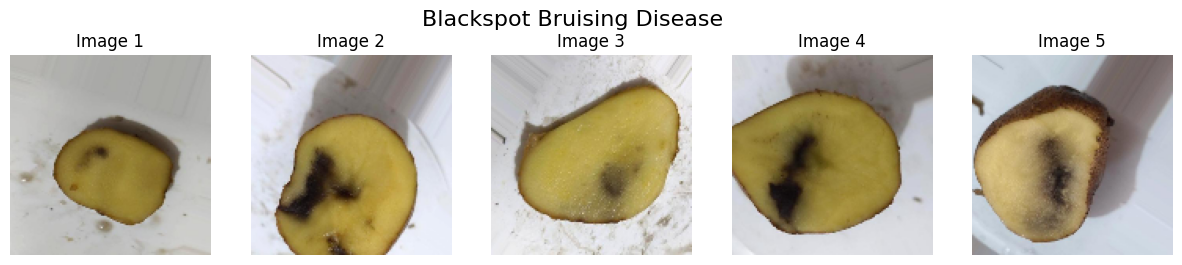

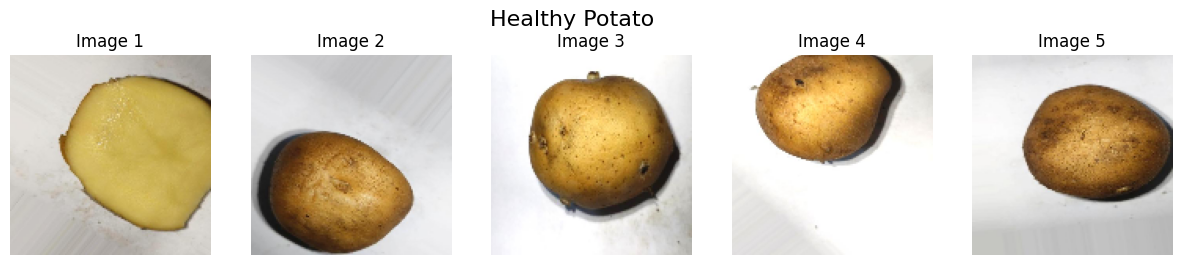

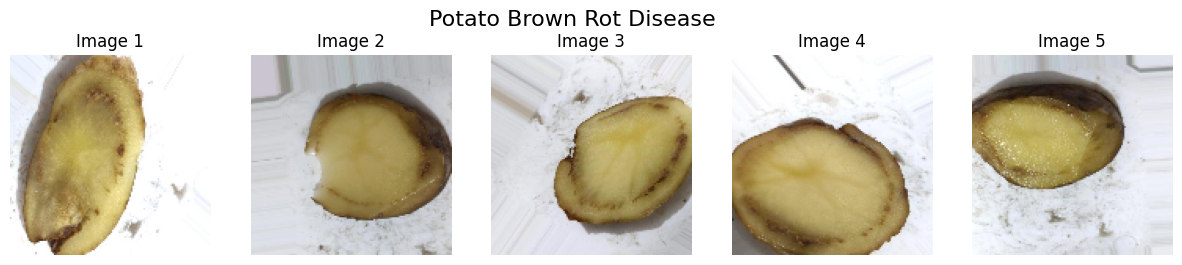

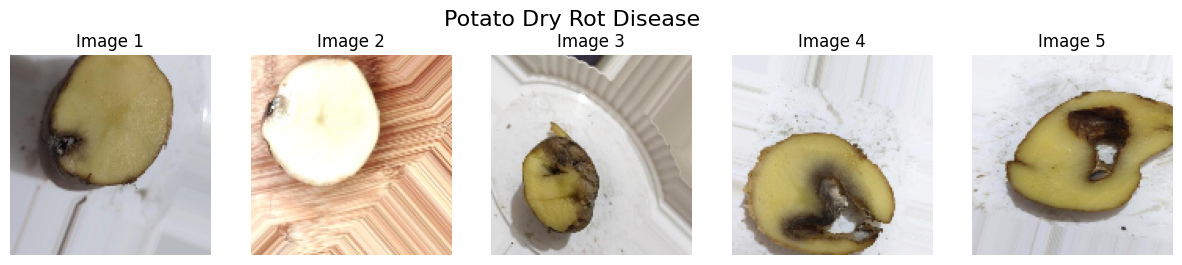

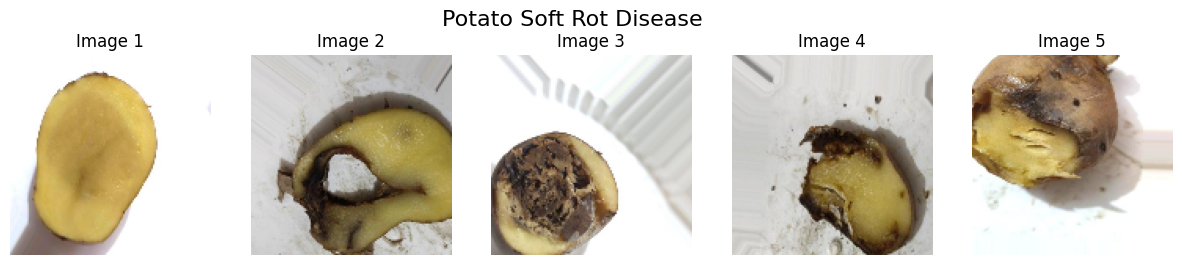

In [ ]:
# Chemin vers le répertoire contenant les images :
data_dir = '/content/dataset/Images_potatoes'

# Liste des classes (noms des sous-répertoires)
classes = sorted(os.listdir(data_dir))

# Afficher 5 images par classe
for classe in classes:
    classe_dir = os.path.join(data_dir, classe)
    images = os.listdir(classe_dir)[:5]

    # Afficher les images :
    plt.figure(figsize=(15, 3))
    plt.suptitle(classe, fontsize=16)

    for i, img_name in enumerate(images, 1):
        img_path = os.path.join(classe_dir, img_name)
        img = image.load_img(img_path, target_size=(128, 128))

        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Image {i}')

    plt.show()


## **<font color="blue">Exploration des Catégories dans l'Ensemble d'Entraînement</font>**


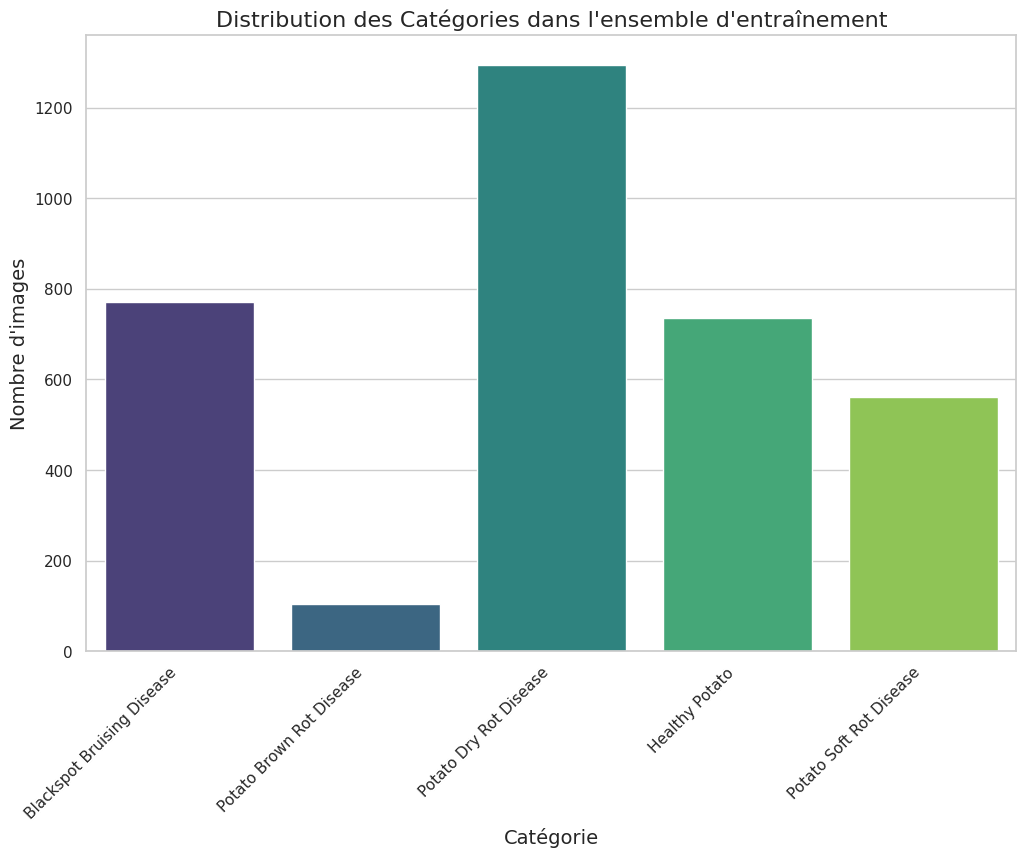

In [ ]:
# Chemin vers le dossier contenant les catégories
train_folder_path = '/content/dataset/Images_potatoes'

# Liste des catégories
categories = os.listdir(train_folder_path)

# Création d'une liste pour stocker le nombre d'images par catégorie
image_count_per_category = [len(os.listdir(os.path.join(train_folder_path, category))) for category in categories]

# Création d'un DataFrame pour la visualisation avec Seaborn
category_data = pd.DataFrame({'Category': categories, 'Image Count': image_count_per_category})

# Affichage de la distribution des catégories
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='Category', y='Image Count', data=category_data, palette='viridis')
plt.title('Distribution des Catégories dans l\'ensemble d\'entraînement', fontsize=16)
plt.xlabel('Catégorie', fontsize=14)
plt.ylabel('Nombre d\'images', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


##**<font color="blue">Informations sur les Classes et le Nombre d'Images</font>**

In [ ]:
# Chemin vers le répertoire contenant les images
data_dir = '/content/dataset/Images_potatoes'

# Liste des classes (noms des sous-répertoires)
classes = sorted(os.listdir(data_dir))

# Afficher le nombre d'images par classe
for classe in classes:
    classe_dir = os.path.join(data_dir, classe)
    images = os.listdir(classe_dir)
    num_images = len(images)

    print(f"Classe : {classe} - Nombre d'images : {num_images}")


Classe : Blackspot Bruising Disease - Nombre d'images : 770
Classe : Healthy Potato - Nombre d'images : 735
Classe : Potato Brown Rot Disease - Nombre d'images : 105
Classe : Potato Dry Rot Disease - Nombre d'images : 1295
Classe : Potato Soft Rot Disease - Nombre d'images : 560


## **<font color="blue">Analyse des Dimensions des Images par Catégorie</font>**

In [ ]:
def process_image(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    image_type = 'Healthy' if 'Healthy' in os.path.basename(image_path) else 'Disease'
    return {'Width': width, 'Height': height, 'Type': image_type}

def analyze_image_dimensions(train_folder_path):
    # Liste des catégories
    categories = os.listdir(train_folder_path)

    # Création d'une liste pour stocker les dimensions et le type de chaque image
    image_info = []

    # Parcours de chaque catégorie et de ses images
    for category in categories:
        category_path = os.path.join(train_folder_path, category)
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            image_info.append({'Category': category, **process_image(image_path)})

    # Création d'un DataFrame pour la visualisation avec Seaborn
    info_data = pd.DataFrame(image_info)

    # Statistiques descriptives par catégorie
    summary_stats = info_data.groupby('Category')[['Width', 'Height']].describe().reset_index()

    # Impression du tableau avec tabulate
    print(tabulate(summary_stats, headers='keys', tablefmt='fancy_grid', showindex=False))

# Appel de la fonction avec le chemin vers le dossier "train"
train_folder_path = '/content/dataset/Images_potatoes'
analyze_image_dimensions(train_folder_path)

╒════════════════════════════╤══════════════════════╤═════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤═══════════════════════╤══════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ ('Category', '')           │   ('Width', 'count') │   ('Width', 'mean') │   ('Width', 'std') │   ('Width', 'min') │   ('Width', '25%') │   ('Width', '50%') │   ('Width', '75%') │   ('Width', 'max') │   ('Height', 'count') │   ('Height', 'mean') │   ('Height', 'std') │   ('Height', 'min') │   ('Height', '25%') │   ('Height', '50%') │   ('Height', '75%') │   ('Height', 'max') │
╞════════════════════════════╪══════════════════════╪═════════════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╪═══════════════════════╪═════════════


**----- Les statistiques descriptives par catégorie pour les dimensions des images révèlent que toutes les images ont une largeur constante de 512 pixels. La distribution des hauteurs est également uniforme à 512 pixels, indiquant une cohérence dans les dimensions des images pour chaque catégorie, ce qui facilitera le traitement uniforme lors de la création du modèle de classification.**

## **<font color="blue">Analyse de l'Intensité des Couleurs par Catégorie</font>**

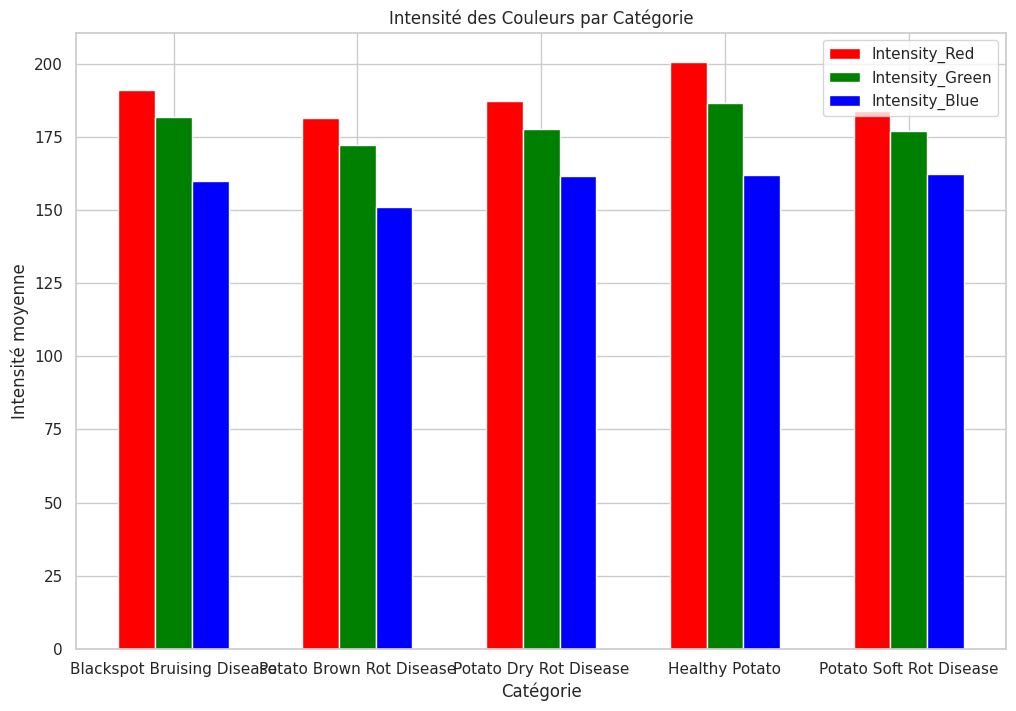

In [ ]:
def process_image_color_intensity(image_path):
    with Image.open(image_path) as img:
        # Convertir l'image en tableau numpy
        img_array = np.array(img)

        # Calculer l'intensité moyenne des canaux de couleur
        intensity_red = np.mean(img_array[:, :, 0])
        intensity_green = np.mean(img_array[:, :, 1])
        intensity_blue = np.mean(img_array[:, :, 2])

    return {'Intensity_Red': intensity_red, 'Intensity_Green': intensity_green, 'Intensity_Blue': intensity_blue}

def analyze_color_intensity(train_folder_path):
    # Liste des catégories
    categories = os.listdir(train_folder_path)

    # Création d'une liste pour stocker l'intensité des couleurs de chaque image
    color_intensity_info = []

    # Parcours de chaque catégorie et de ses images
    for category_index, category in enumerate(categories):
        category_path = os.path.join(train_folder_path, category)
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            color_intensity_info.append({'Category': str(category), 'Category_Index': category_index, **process_image_color_intensity(image_path)})

    # Création d'un DataFrame pour la visualisation avec Seaborn
    color_intensity_data = pd.DataFrame(color_intensity_info)

    # Affichage de la distribution de l'intensité des couleurs en barres groupées
    plt.figure(figsize=(12, 8))
    bar_width = 0.2
    bar_positions = np.arange(len(categories))

    for i, channel in enumerate(['Intensity_Red', 'Intensity_Green', 'Intensity_Blue']):
        plt.bar(bar_positions + i * bar_width, color_intensity_data.groupby('Category_Index')[channel].mean(), bar_width, label=channel, color=['red', 'green', 'blue'][i])

    plt.xticks(bar_positions + bar_width, categories)
    plt.title('Intensité des Couleurs par Catégorie')
    plt.xlabel('Catégorie')
    plt.ylabel('Intensité moyenne')
    plt.legend()
    plt.show()

# Appel de la fonction avec le chemin vers le dossier "train"
train_folder_path = '/content/dataset/Images_potatoes'
analyze_color_intensity(train_folder_path)


*Rouge (Red)* : L'intensité moyenne du canal rouge représente la quantité moyenne de lumière rouge présente dans l'image. Les valeurs plus élevées indiquent une intensité de rouge plus élevée.

*Vert (Green)* : De manière similaire, l'intensité moyenne du canal vert représente la quantité moyenne de lumière verte dans l'image. Les valeurs plus élevées indiquent une intensité de vert plus élevée.

*Bleu (Blue)* : L'intensité moyenne du canal bleu représente la quantité moyenne de lumière bleue dans l'image. Les valeurs plus élevées indiquent une intensité de bleu plus élevée.

## **<font color="blue">Charger le Modèle VGG16 Pré-entraîné sans les Couches Fully Connected</font>**

In [ ]:
# Charger le modèle VGG16 pré-entraîné sans les couches fully connected :
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Geler les couches du modèle VGG16
for layer in base_model.layers:
    layer.trainable = False

# Créer un nouveau modèle en ajoutant des couches personnalisées au-dessus du modèle VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes: 4 maladies + 1 healthy

# Compiler le modèle
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()


58889256/58889256 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 16813381 (64.14 MB)
Trainable params: 2098693 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


**---- Le modèle a été créé en utilisant l'architecture VGG16 pré-entraînée pour la classification des maladies de pommes de terre. Le téléchargement des poids pré-entraînés a réussi, et le modèle résultant est un réseau de neurones séquentiel. Il comprend des couches de convolution et de pooling issues de VGG16, suivies d'une couche Flatten pour transformer les données en un vecteur. Des couches fully connected, incluant une couche Dropout pour prévenir le surajustement, sont ajoutées, aboutissant à une sortie avec 5 classes (4 maladies + 1 sain). Le modèle est compilé avec l'optimiseur Adam et la fonction de perte categorical_crossentropy. Il compte un total de 16,813,381 paramètres, dont 2,098,693 sont entraînables. L'architecture et les paramètres non entraînables proviennent du modèle VGG16 pré-entraîné. Le modèle est prêt à être entraîné pour la classification des maladies de pommes de terre avec un ensemble de données spécifié.**

In [ ]:
data_dir =  '/content/dataset/Images_potatoes'

##**<font color="blue">Définir les Paramètres et Entraîner le Modèle</font>**

In [ ]:
# Définir les paramètres pour le générateur de données
batch_size = 32
image_size = (128, 128)
epochs = 10

# Diviser les données en ensembles d'entraînement, de validation et de test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Callbacks pour enregistrer le meilleur modèle et arrêter tôt si nécessaire
callbacks = [
    ModelCheckpoint("best_model_vgg.h5", save_best_only=True),
    EarlyStopping(patience=3, restore_best_weights=True)
]

# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)




Found 2772 images belonging to 5 classes.
Found 693 images belonging to 5 classes.
Epoch 1/10
87/87 [==============================] - 8s 95ms/step - loss: 0.3652 - accuracy: 0.8626 - val_loss: 0.4276 - val_accuracy: 0.8283
Epoch 2/10
87/87 [==============================] - 8s 88ms/step - loss: 0.3250 - accuracy: 0.8763 - val_loss: 0.3605 - val_accuracy: 0.8557
Epoch 3/10
87/87 [==============================] - 9s 105ms/step - loss: 0.2616 - accuracy: 0.9019 - val_loss: 0.3605 - val_accuracy: 0.8672
Epoch 4/10
87/87 [==============================] - 9s 101ms/step - loss: 0.2397 - accuracy: 0.9138 - val_loss: 0.3965 - val_accuracy: 0.8629
Epoch 5/10
87/87 [==============================] - 9s 105ms/step - loss: 0.2064 - accuracy: 0.9192 - val_loss: 0.3417 - val_accuracy: 0.8817
Epoch 6/10
87/87 [==============================] - 8s 95ms/step - loss: 0.1851 - accuracy: 0.9282 - val_loss: 0.3505 - val_accuracy: 0.8615
Epoch 7/10
87/87 [==============================] - 7s 84ms/step - l

##**<font color="blue">Evaluer le Modèle</font>**

In [ ]:
# Évaluer les performances du modèle
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Calculer et afficher les métriques de performance
metrics = model.evaluate(test_generator)
print("Loss:", metrics[0])
print("Accuracy:", metrics[1])

Found 693 images belonging to 5 classes.
22/22 [==============================] - 1s 63ms/step - loss: 0.3058 - accuracy: 0.8889
Loss: 0.30584871768951416
Accuracy: 0.8888888955116272


**---- Le modèle a été entraîné avec succès pour la classification des maladies de pommes de terre en utilisant un ensemble de données comprenant cinq classes. Après dix époques d'entraînement, le modèle a atteint une précision de 88.89% sur l'ensemble de validation. La perte (loss) obtenue est de 0.3058.**

### **<font color="blue"> Métriques d'évaluation: F1 score , recall et precision et aussi la matrice de confusion.**

In [ ]:
# Charger le modèle pré-entraîné
model = load_model("best_model_vgg.h5")

# Charger les générateurs de données pour l'ensemble de validation
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Prédire les classes pour l'ensemble de validation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convertir les probabilités prédites en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Afficher la matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred_classes)
print("Matrice de Confusion:")
print(conf_mat)

# Afficher le rapport de classification (précision, rappel, F1-score, support)
class_names = list(validation_generator.class_indices.keys())
print("\nRapport de Classification:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Calculer et afficher le F1-score, la recall et la précision
f1 = f1_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')

print("\nF1-score:", f1)
print("Recall:", recall)
print("Précision:", precision)



Found 693 images belonging to 5 classes.
22/22 [==============================] - 3s 140ms/step
Matrice de Confusion:
[[140   2   1   8   3]
 [  1 146   0   0   0]
 [  0   0  20   0   1]
 [  9   0   0 236  14]
 [ 13   0   0  25  74]]

Rapport de Classification:
                            precision    recall  f1-score   support

Blackspot Bruising Disease       0.86      0.91      0.88       154
            Healthy Potato       0.99      0.99      0.99       147
  Potato Brown Rot Disease       0.95      0.95      0.95        21
    Potato Dry Rot Disease       0.88      0.91      0.89       259
   Potato Soft Rot Disease       0.80      0.66      0.73       112

                  accuracy                           0.89       693
                 macro avg       0.90      0.89      0.89       693
              weighted avg       0.89      0.89      0.89       693


F1-score: 0.8864581909522511
Recall: 0.8888888888888888
Précision: 0.8868646096461991


---- La première ligne concerne la classe "Blackspot Bruising Disease". Elle y a 140 vrais positifs, 2 faux négatifs (erreur en classifiant comme négatif alors que c'est positif), 1 faux positif (erreur en classifiant comme positif alors que c'est négatif), 8 vrais négatifs et 3 faux positifs. De mm manière les autres classe.
<hr>
----Le rapport de classification donne des métriques telles que la précision, le rappel et le F1-score pour chaque classe, ainsi que la précision, le rappel et le F1-score moyens pondérés.
<hr>
On trouve donc :
F1-score: 0.8864581909522511
Recall: 0.8888888888888888
Précision: 0.8868646096461991
<hr>
Sachant que :
Le F1-score est une moyenne pondérée de la précision et du rappel, fournissant une mesure globale de la performance du modèle.
Le rappel (recall) mesure la capacité du modèle à identifier toutes les instances positives réelles.
La précision mesure la proportion d'instances positives prédites correctement par le modèle.

###**<font color="blue">Visualiser les Scores de Performance</font>**

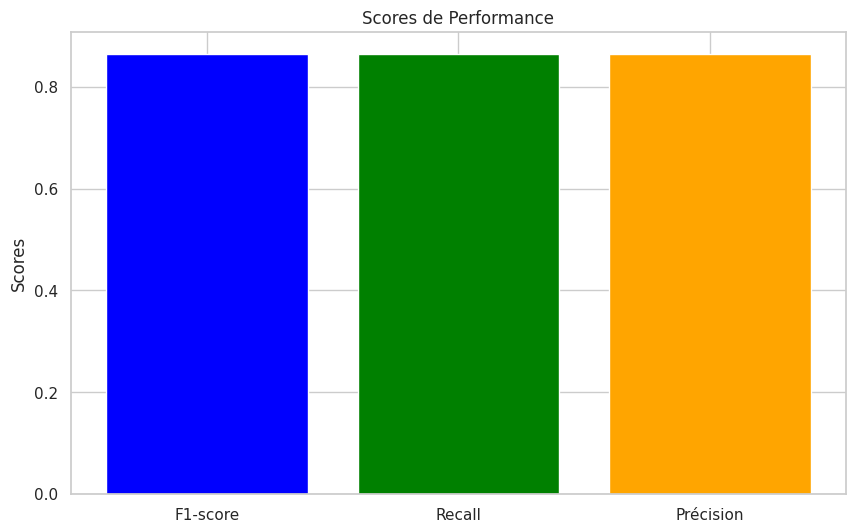

In [ ]:
# Créer un graphique à barres pour le F1-score, la recall et la précision
labels = ['F1-score', 'Recall', 'Précision']
values = [f1, recall, precision]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('Scores de Performance')
plt.ylabel('Scores')
plt.show()

##**<font color="blue">Prédiction de modèle</font>**

In [ ]:
img_path="/content/dataset/Images_potatoes.jpg"

1/1 [==============================] - 0s 20ms/step


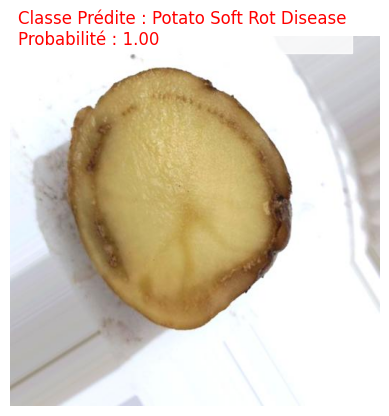

In [ ]:
# Charger l'image d'origine
original_img = cv2.imread(img_path)

# Redimensionner l'image à la taille attendue (128x128)
resized_img = cv2.resize(original_img, (128, 128))
resized_img_array = image.img_to_array(resized_img)
resized_img_array = np.expand_dims(resized_img_array, axis=0)
resized_img_array = preprocess_input(resized_img_array)

# Faire la prédiction
predictions = model.predict(resized_img_array)

# Obtenir la classe prédite et la probabilité maximale
predicted_class = np.argmax(predictions)
predicted_prob = np.max(predictions)

# Obtenir le nom de la classe à partir de l'indice
class_names = list(validation_generator.class_indices.keys())
predicted_class_name = class_names[predicted_class]

# Afficher l'image avec le texte de la classe prédite et de la probabilité
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

# Ajouter le texte avec la classe prédite et la probabilité
text = 'Classe Prédite : {}\nProbabilité : {:.2f}'.format(predicted_class_name, predicted_prob)
plt.text(10, 10, text, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.title('')
plt.axis('off')
plt.show()


#**<font color="green">5- Conclusion</font>**


**Ce projet de classification des maladies de pommes de terre a réussi à développer un modèle performant basé sur l'architecture VGG16, permettant une détection précise des maladies, ouvrant ainsi la voie à une agriculture intelligente et proactive.**

![Potato Diseases Conclusion](https://assets.epicurious.com/photos/62bde94c6504040e6ea84a90/16:9/w_2560%2Cc_limit/PotatoStorage_HERO_062922_36230.jpg)


## **<font color="red">Merci pour le suivi de mon notebook**

![Merci pour le suivi](https://cdn-0.emojis.wiki/emoji-pics/facebook/smiling-face-with-hearts-facebook.png)
